Загружаем данные о графе

In [199]:
!wget https://snap.stanford.edu/data/amazon0302.txt.gz

--2024-04-25 02:37:07--  https://snap.stanford.edu/data/amazon0302.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80, 198.41.0.4, 170.247.170.2, ...
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4664334 (4.4M) [application/x-gzip]
Saving to: ‘amazon0302.txt.gz’

amazon0302.txt.gz   100%[===================>]   4.45M  1.40MB/s    in 3.2s    

2024-04-25 02:37:11 (1.40 MB/s) - ‘amazon0302.txt.gz’ saved [4664334/4664334]



In [200]:
!gzip -d ./amazon0302.txt.gz

In [3]:
!wget https://snap.stanford.edu/data/congress_network.zip
!unzip congress_network.zip
!rm congress_network.zip

--2024-04-23 18:01:02--  https://snap.stanford.edu/data/congress_network.zip
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80, 198.41.0.4, 170.247.170.2, ...
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193815 (189K) [application/zip]
Saving to: ‘congress_network.zip’

congress_network.zi 100%[===================>] 189.27K   219KB/s    in 0.9s    

2024-04-23 18:01:04 (219 KB/s) - ‘congress_network.zip’ saved [193815/193815]

Archive:  congress_network.zip
  inflating: congress_network/compute_vc.py  
  inflating: congress_network/congress.edgelist  
  inflating: congress_network/congress_network_data.json  
  inflating: congress_network/histogram_weights.py  
  inflating: congress_network/README.txt  
  inflating: congress_network/viral_centrality.py  


In [6]:
!wget https://snap.stanford.edu/data/wiki-Vote.txt.gz
!gzip -d ./wiki-Vote.txt.gz

--2024-04-23 18:00:00--  https://snap.stanford.edu/data/wiki-Vote.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80, 198.41.0.4, 170.247.170.2, ...
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 290339 (284K) [application/x-gzip]
Saving to: ‘wiki-Vote.txt.gz’

wiki-Vote.txt.gz    100%[===================>] 283.53K   271KB/s    in 1.0s    

2024-04-23 18:00:02 (271 KB/s) - ‘wiki-Vote.txt.gz’ saved [290339/290339]

gzip: ./wiki-Vote.txt already exists; do you wish to overwrite (y or n)? ^C


In [2]:
!git clone https://github.com/OafishSpark/InfluencerSearchAlgorithms

!mv /content/InfluencerSearchAlgorithms/* /content/
!rm -rf /content/InfluencerSearchAlgorithms

Cloning into 'InfluencerSearchAlgorithms'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 96 (delta 40), reused 84 (delta 28), pack-reused 0
Receiving objects: 100% (96/96), 16.10 KiB | 1.46 MiB/s, done.
Resolving deltas: 100% (40/40), done.
mv: cannot stat '/content/InfluencerSearchAlgorithms/*': No such file or directory


In [1]:
import networkx as nx

import numpy as np
from numpy import random

from tqdm import tqdm

In [8]:
from models.threshold_model import linear_threshold_model
from models.sir_model import sir_model, sir_inf_model

from influencers.greedy_kkt import greedy_kkt_influencers
from influencers.centrality import centrality_influencers
from influencers.shapley_value import shapley_value_influencers
from influencers.csr import csr_influencers
from influencers.hierarchy import hierarchy_influencers_dull, hierarchy_influencers_with_csr, hierarchy_influencers_with_centrality

from communities.clustering import clustering_communities
from communities.shapley_value import shapley_value_communities

from communities.hierarchy import hierarchy_communities_original, hierarchy_communities_improved

In [4]:
graph_congress = nx.read_edgelist("./congress_network/congress.edgelist", create_using=nx.DiGraph())

In [5]:
graph_wiki_votes = nx.read_edgelist("./wiki-Vote.txt", create_using=nx.DiGraph())
nx.set_edge_attributes(graph_wiki_votes, 1, 'weight')

In [6]:
subgraph_wiki_votes = nx.subgraph(graph_wiki_votes, list(graph_wiki_votes.nodes)[1530:1730])

In [7]:
# graph_epinions = nx.read_edgelist("./wiki-Talk.txt", create_using=nx.DiGraph())
# nx.set_edge_attributes(graph_epinions, 1, 'weight')

In [8]:
# subgraph_epinions = nx.subgraph(graph_epinions, list(graph_epinions.nodes)[0:100])

In [9]:
graphs = {
    "graph congress": graph_congress,
    "graph wiki votes": subgraph_wiki_votes,
    # "graph epinions": subgraph_epinions,
}

In [10]:
for name in graphs.keys():
  print(name)
  graph = graphs[name]
  print(graph.number_of_nodes())
  print(graph.number_of_edges())
  print(nx.density(graph))
  print(nx.number_strongly_connected_components(graph))
  print("")

graph congress
475
13289
0.05902287363979569
7

graph wiki votes
200
417
0.010477386934673366
185

graph epinions
100
1047
0.10575757575757576
12



In [11]:
graph = graphs["graph congress"]
# graph = graphs["graph epinions"]
# graph = graphs["graph wiki votes"]

Communities

In [288]:
communities = {
    "communities shapley": shapley_value_communities(graph, 5),
    "communities clusters": clustering_communities(graph, 5),
    "communities hierarchy original": hierarchy_communities_original(graph, 5),
    "communities hierarchy improved": hierarchy_communities_improved(graph, 5)
}

Influencers

In [289]:
influencers_pack = {
    "influencers hierarchy with centrality": hierarchy_influencers_with_centrality(graph, 5),
    "influencers shapley": shapley_value_influencers(graph, 5),
    "influencers centrality": centrality_influencers(graph, 5),
    "influencers kkt": greedy_kkt_influencers(graph, 5),
    "influencers hierarchy orig": hierarchy_influencers_dull(graph, 5),
    "influencers hierarchy improved": hierarchy_influencers_with_csr(graph, 5),
}

In [290]:
influencers_csr = dict(zip(
    ['csr ' + name for name in communities.keys()],
    [csr_influencers(graph, 5, community) for community in communities.values()]
))

In [291]:
influencers_pack.update(influencers_csr)

In [86]:
def perform_experiment(
    n_experiments: int,
    graph: nx.DiGraph,
    influencers_dict: dict,
    time: int = 5,
) -> dict:
  nodes = list(graph.nodes)
  n_nodes = len(nodes)
  results = dict(zip(
    ["linear threshold model", "SIR model", "Infinite SIR model"],
    [dict([(name, 0) for name in influencers_dict.keys()]) for _ in range(3)]
  ))
  for _ in tqdm(range(n_experiments)):
    theta = dict(zip(list(graph.nodes), random.uniform(0.01, 0.99, graph.number_of_nodes())))
    # infection_prob = dict(zip(nodes, random.uniform(0.01, 0.99, n_nodes)))
    # recover_prob = dict(zip(nodes, random.uniform(0.01, 0.99, n_nodes)))
    for name in influencers_dict.keys():
      influencers = influencers_dict[name]
      results['linear threshold model'][name] += len(linear_threshold_model(graph, influencers, time, theta)) / n_experiments
      results['SIR model'][name] += len(sir_model(graph, influencers, time)) / n_experiments
  for name in influencers_dict.keys():
    influencers = influencers_dict[name]
    results['Infinite SIR model'][name] += len(sir_inf_model(graph, influencers, time))
  return results

In [269]:
number_of_experiments = 100

In [292]:
times = [4*i + 1 for i in range(10)]
results = dict(zip(
    times,
    [perform_experiment(number_of_experiments, graph, influencers_pack, time) for time in times]
))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:58<00:00,  1.79s/it]


In [293]:
times

[1, 5, 9, 13, 17, 21, 25, 29, 33, 37]

In [ ]:
results

In [ ]:
for results_t in results.values():
    for model in results_t.keys():
      print(model + ":")
      for infl_alg in sorted(results_t[model], reverse=True, key=lambda x: results_t[model][x])[:5]:
        print(infl_alg + ": " + str(results_t[model][infl_alg]))
      print('\n')

In [41]:
import matplotlib.pyplot as plt
from copy import deepcopy

In [294]:
inner_lists = {
    "influencers hierarchy with centrality": [],
    "influencers kkt" : [],
    "influencers shapley": [],
    "influencers centrality": [],
    "influencers kkt": [],
    "influencers hierarchy orig": [],
    "influencers hierarchy improved": [],
    "csr communities shapley": [],
    "csr communities clusters": [],
    "csr communities hierarchy original": [],
    "csr communities hierarchy improved": [],
}

results_lists = {
    "linear threshold model": inner_lists,
    "SIR model": deepcopy(inner_lists),
    "Infinite SIR model": deepcopy(inner_lists),
}

for t in times:
    for model in results[t].keys():
        for key in results[t][model].keys():
            results_lists[model][key].append(results[t][model][key])

In [264]:
results_lists['linear threshold model']['influencers hierarchy with centrality']

[24.4,
 56.49999999999999,
 67.8,
 52.89999999999999,
 45.099999999999994,
 74.3,
 76.7,
 57.800000000000004,
 52.10000000000001,
 57.7]

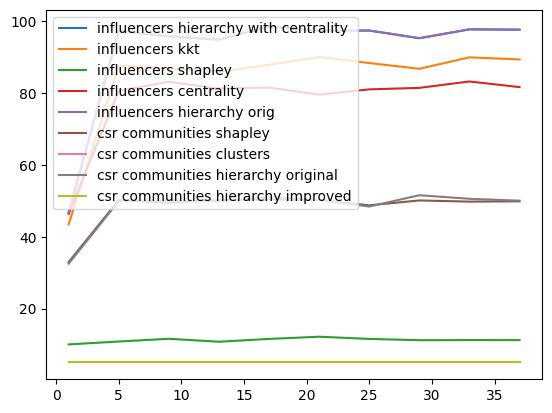

In [299]:
fig, ax = plt.subplots()

for key in results_lists["linear threshold model"]:
    if key != "influencers hierarchy improved":
        ax.plot(times, results_lists["linear threshold model"][key], label = key)

plt.legend(loc='upper left')

plt.show()

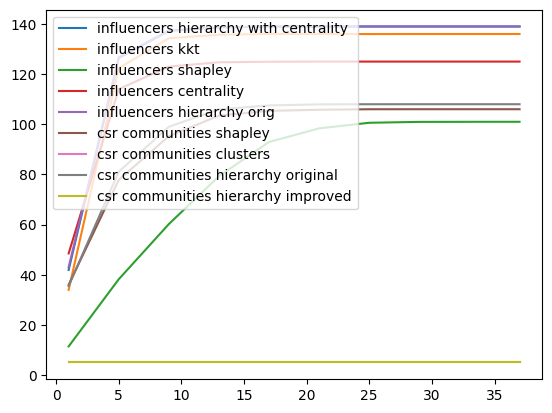

In [298]:
fig, ax = plt.subplots()

for key in results_lists["SIR model"]:
    if key != "influencers hierarchy improved":
        ax.plot(times, results_lists["SIR model"][key], label = key)

plt.legend(loc='upper left')

plt.show()

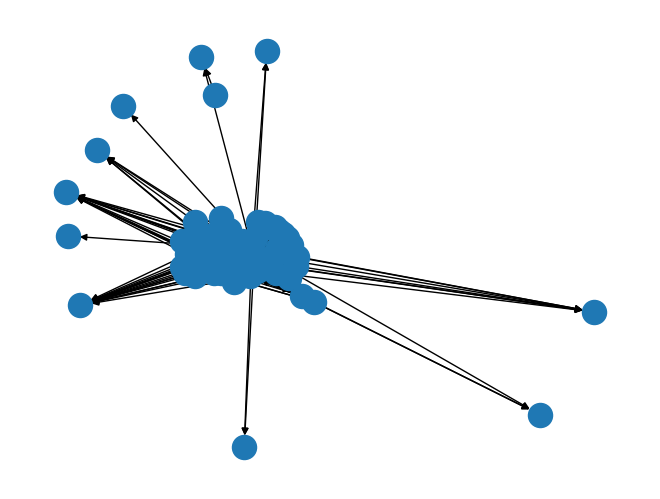

In [255]:
nx.draw(graph)

In [285]:
for community in communities.keys(): 
    print(community, nx.community.modularity(graph, communities[community]))

communities shapley 0.10117963163947684
communities clusters 0.11388836103652836
communities hierarchy original 0.09485599707171427
communities hierarchy improved 0.19085496943010183


In [286]:
for community in communities.keys(): 
    print(community, nx.community.partition_quality(graph, communities[community]))

communities shapley (0.33764767853111594, 0.6777836997557184)
communities clusters (0.5935736323274889, 0.36390406395736175)
communities hierarchy original (0.24787418165399955, 0.771925383077948)
communities hierarchy improved (0.43607494920611034, 0.678023539862314)


In [275]:
nx_communities = nx.community.greedy_modularity_communities(graph, 10)
print(nx.community.modularity(graph, nx_communities))
print(nx.community.partition_quality(graph, nx_communities))

0.19471013283050953
(0.5386819484240688, 0.6786868686868687)


In [12]:
edges = list(graph.edges)
edges[0]

('0', '4')

In [26]:
activating = {'a': 1, 'b': 0, 'c': 0, 'd': 2, 'e': 3, 'f': 3}
activated = [node for node in filter(lambda x: activating[x] > 0, activating.keys())]
activated

['a', 'd', 'e', 'f']

In [43]:
b = 0
for a in graph.in_edges('0'):
    b = graph.edges[a]['weight']
b

0.0029850746268656717